<img src="images\Logo_UCLL_ENG_RGB.png" style="background-color:white;" />

# Data Analytics & Machine learning

Lecturers: Aimée Lynn Backiel, Kenric Borgelioen, Sofie Torfs, Lies Bollens

Academic year 2025-2026

## Lab 9: Clustering

### Lecture outline

1. Unsupervised learning: clustering
    * Partitional clustering
    * Hierarchcal clustering

### Recap of last lecture(s)

#### Lab 1

1. We ensured we had a valid Python installation.
2. We learnt what a virtual environment is:
   * Isolated Python executable and packages.
   * We created a virtual environment.
3. Absolute path vs relative path recap.
4. Recap of data structures in Python

#### Lab 2
1. Installed Pandas
2. Learnt how to read data
3. Learnt how to calculate mean, mode, median etc.
4. Basic exploration of the 4 variables

#### Lab 3
1. Wrapped up computing summary statistics (mean, median, mode, ...)
2. Learnt how to deal with outliers 
3. Focused on exploration of data

#### Lab 4
1. Univariate data visualization using Matplotlib
   1. Figures and axes
   2. Histograms
   3. Box plots
   4. Bar charts
2. Multivariate data visualization using Seaborn
   1. Scatter plots
   2. Small multiples
   3. Color coding

#### Lab 5
1. Intro to machine learning using scikit-learn
   1. Preprocessing
      1. One Hot encoding
      2. Scaling
      3. Outliers
   2. Regression

#### Lab 6
1. Preprocessing with scikit-learn
   1. ColumnTransformer: Apply a transformation to specific columns.
   2. Pipeline: Do several transformations after each other
2. Evaluation:
   1. Why the mean of the error is a bad idea
   2. Mean absolute error
   3. Mean squared error

#### Lab 7
1. Feature engineering
   1. Binning
   2. Interactions
   3. Custom features
2. Rounding up model evaluation
   1. Cross validation
   2. Hyper parameter tuning

#### Lab 8
1. One large exercise covering all we have done so far in this course applied to classification.

#### Our latest case: Hotel booking dataset

source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

*This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon.*

The goal is to help the two hotels maximize their revenue.



|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | 'Resort hotel' or 'City hotel' |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|




In [ ]:
import pandas as pd
hotel_df = pd.read_csv("data/lab9.csv")
hotel_df.head()

,Unnamed: 0,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel
0,2,0,7,2015,July,27,1,0,1,1,...,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,Resort hotel
1,3,0,13,2015,July,27,1,0,1,1,...,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,Resort hotel
2,4,0,14,2015,July,27,1,0,2,2,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,Resort hotel
3,5,0,14,2015,July,27,1,0,2,2,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,Resort hotel
4,6,0,0,2015,July,27,1,0,2,2,...,NULL,NULL,0,Transient,107.0,0,0,Check-Out,2015-07-03,Resort hotel


#### ❓ In the previous lab, we focused on finding out who cancels a reservation. This was a classification problem. This time, we'll try to find groups in the customers, which is a clustering problem. Can you explain why these two are different?

Classification is a supervised learning technique. This means that our data consists of a bunch of features (X), for which we already know the label (y). After we have fitted our model, we can compare predictions to the original values and get a sense of accuracy of these models.

Clustering is an unsupervised learning technique. Now, even we don't know the labels yet. We can take try to find clusters, but we are not able to check whether the model is 'right' or 'wrong'. We can only look at the intra- and intersimilarity of our clusters.

Go back to lab 6 and take another look on how to prepare your data for modeling. We'll also need to use one-hot encoding on our categorical data and scaling on our numerical data. By now, you should know how to do this yourselves.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Scaling the data to have a mean of 0 and a standard deviation of 1 
from sklearn.compose import make_column_transformer # Applying a transformer to a subset of columns
from sklearn.preprocessing import OneHotEncoder # Turning categorical data to numeric by making a column for each unique value and denoting it as 0 or 1

In [ ]:
num_features = ["LeadTime","ArrivalDateWeekNumber","ArrivalDateDayOfMonth",
                "StaysInWeekendNights","StaysInWeekNights","Adults","Children",
                "Babies","PreviousCancellations",
                "PreviousBookingsNotCanceled", "ADR"]

cat_features = ["hotel","ArrivalDateMonth","Meal","MarketSegment", "IsRepeatedGuest", "RequiredCarParkingSpaces", "TotalOfSpecialRequests",
                "DistributionChannel","ReservedRoomType","DepositType","CustomerType"]

In [ ]:
preprocessor = make_column_transformer((StandardScaler(), num_features), (OneHotEncoder(), cat_features), remainder="drop")


#### Partitional Clustering

In this lab, we will start with partitional clustering. Go back to the theory slides and look up what this means.

We'll create a pipeline to perform kmeans clustering. We will have to chose a value for k.

#### ❓ What does the Kmeans algorithm do? What does this k represent? What would be a good value for it?

The Kmeans algorithm clusters the data into k groups. k represents the number of clusters that we want to create. We don't know which value will be a good one, we'll have to try out some and compare the results.

We randomly chose 3 for our number of clusters. Later on, we'll play with this number. We will then fit the pipeline to our model and get our cluster labels as a result. These labels will represent the cluster our observation belongs to.

#### ❓Look up the documentation of the KMeans algortihm from sklearn.cluster. What type of linkage is used here? What does 'linkage criterion' mean?

This exercise was actually wrong, our bad! KMeans does not have a linkage criterion. This question was supposed to be for the hierarchical clustering. We've added it there and added the answer as well. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

pipeline.fit(hotel_df)

# Get cluster labels
labels = pipeline.named_steps['kmeans'].labels_
print("Cluster Labels:", labels)


Cluster Labels: [0 0 0 ... 1 1 1]


#### ❓ Great, let's visualize this result! Try plotting your data and adding a color to it based on the labels. (Hint: you are supposed to run into a problem here. Explain why!)

The data contains many features, it's not 2 or 3 dimensional. It's impossible to plot something that has more than 3 dimensions (Go ahead, try to visualize that!)
We will use a dimensionality reduction technique called 'PCA'. This technique tries to capture all of the variance in the model in just 2 or 3 dimensions. Using just these 2 or 3 dimensions will enable you to visualize your data.



#### Adding Principal Component Analysis (PCA) as a dimensionality reduction technique first 

In order to be able to plot our data, we will add a dimensionality reduction technique, called PCA. As we have already seen in our datasets, there are a lot of columns. If we transform the categorical variables into numerical ones using one-hot encoding, we end up with even more columns. More columns means a higher dimensionality, which means that our models grow more complex. 

More complex models means more potential for things going wrong. So, as usual, we will try to keep the model simple and the number of features compact. This is where the PCA comes in handy. 

As an example: consider the dataset shown on the picture below. 

In the original dataset, on the left, all the datapoins are represented with 3 variables. But, if you look closer at the data, you see that you do not need 3 variables, because it is possible to find a 2D plane that is actually able to represent most of our data. This plane is two-dimensional, yet it is able to represent most of our data. As you can see, not all the points lie exactly on the plane, but most of them are well represented by using only two dimensions. 

Usually, the extra benefit of exactly representing all points (using the full dimensionality) does not weigh up against approximately representing the data with less dimensions, and thereby creating a smaller, simpler version of the data. 

The PCA algorithm restructures the data into new dimensions and sorts them. The first dimension will be the most important one for explaining our data, the second one the second most important and so forth. Once we have applied the PCA algorithm, we can check how important these new dimensions actually are, using something called `explained variance ratio`, which will tell us how much of the total variance is explained by each of the dimensions.





<img src="images\PCA.png" style="background-color:white;" />

Below, we have updated the pipeline to transform the data into 2 PCA components. This way, we will be able to get a 2D view of our data with it's cluster labels. The PCA components are stored in a variable 'X_pca', with the first column being the first component and so on.

Cluster Labels: [1 1 1 ... 0 0 0]


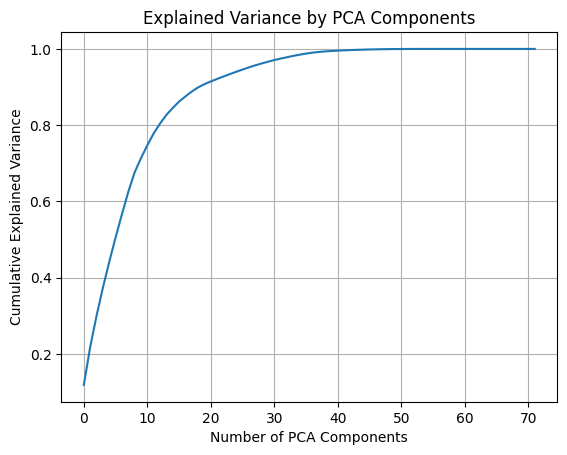

In [ ]:
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('pca', PCA()), 
    ('kmeans', KMeans(n_clusters=3, random_state=4)),
])

pipeline.fit(hotel_df)

# Get cluster labels
labels = pipeline.named_steps['kmeans'].labels_
print("Cluster Labels:", labels)

# Get the PCA components (transformed features)
X_pca = pipeline.named_steps['pca'].transform(pipeline.named_steps['preprocess'].transform(hotel_df))


# Get explained variance ratio, which indicates the amount of variance captured by each PCA component.
# This helps to understand how much information is retained in the reduced dimensions.
# The explained variance ratio always sums up to 1. 
variance_per_dimension = pipeline.named_steps['pca'].explained_variance_ratio_

# we will make a cumulative sum plot to see how many dimensions we need to capture most of the variance
plt.plot(np.cumsum(variance_per_dimension))
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()  

The plot above shows us how important each component is for explained the total data. The first three dimensions together represent about 30% of the total variance. This is not a lot, as there is still 70% of the variance which is not being accounted for. 
However, given that we can only plot three dimensions, for this particular dataset, this is the best we can do. In order to represent at least 80% of the total variance of the data, we need at least 13 dimensions. You can see the diminishing returns in the plot above: the more dimensions you add, the less extra information they will add. 

#### ❓ Create a scatterplot of the PCA components colored by the cluster labels.

TIP: `X_pca` contains our data, after PCA. `X_pca[:,0]` gives the data of the first dimension,  `X_pca[:,1]` of the second, and so forth. 
`labels` are the labels we just created using K-means. 

TIP: Normally, you always use the first dimensions, as these are the most important. If you want to see the difference between the importance of the first versus the other dimensions, try to plot two different random dimensions and observe if you still see clusters. 

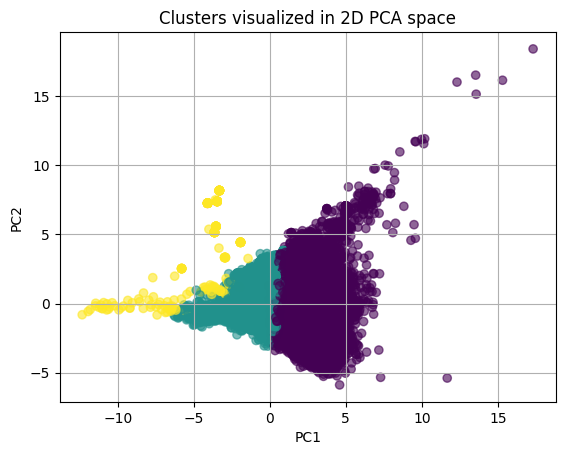

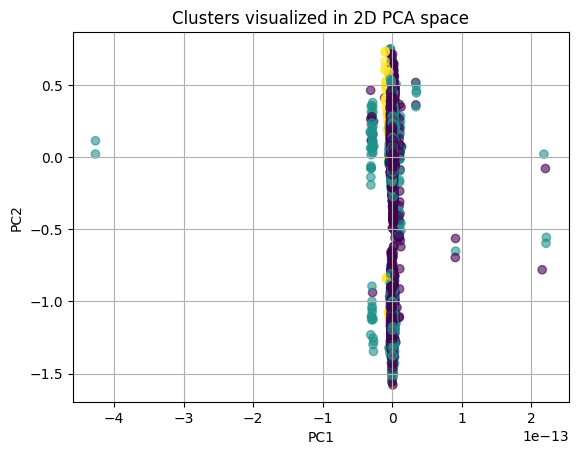

In [ ]:
# Scatter plot of PCA components colored by cluster labels
plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=labels, 
    alpha=0.6
)

plt.title("Clusters visualized in 2D PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Scatter plot of two random PCA components colored by cluster labels
plt.scatter(
    X_pca[:, 64], 
    X_pca[:, 21], 
    c=labels, 
    alpha=0.6
)

plt.title("Clusters visualized in 2D PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

#### ❓ EXTRA: repeat this exercise in 3D. 

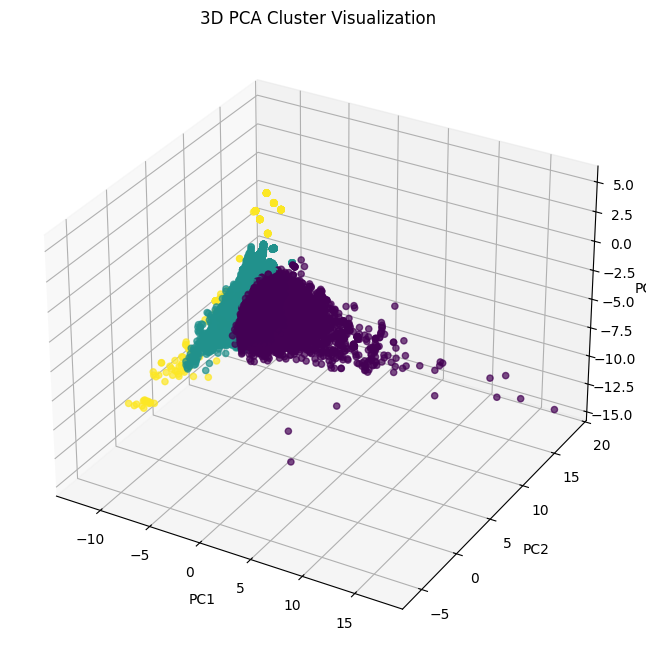

In [70]:
from mpl_toolkits.mplot3d import Axes3D


# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=labels,
    alpha=0.7
)

ax.set_title("3D PCA Cluster Visualization")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

### Choosing the optimal value of k 
Like we said before, the value of k is chosen randomly. We often iterate over different values of k, fitting models for each of the values and comparing the outcome. 

Since clustering is an unsupervised method, we don't have a definite way to show which clustering is better than the other. A visualisation that is commonly used is an inertia plot. Inertia represents the total distances from each plots to each cluster's center. The lower the inertia, the tighter the clusters. 

#### ❓ In theory, we could just take the value of k for which the inertia is lowest. This would mean the cluster are as tight as possible. Why is this a bad idea in practice?

The inertia is always going to be the lowest when each datapoint is in it's own cluster. This won't give us any information about the data.

Instead, we are going to look for the 'elbow' in the plot. The elbow point is where adding more clusters starts giving diminishing returns, meaning the inertia decreases more slowly after this point. In the beginning, adding a cluster reduces the inertia by a significant amount. After a while, the curve starts to flatten, implying that splitting the data even more does not lead to significantly tighter clusters.

We'll create an inertia plot for k between 2 and 10.

#### ❓ Why don't we start with k = 1?

k represents the number of clusters. Creating 1 cluster would mean you just take the entire dataset and put it in the same cluster. This does not provide you with any information.

In [73]:
def evaluate_kmeans(X, k_range=range(2, 11)):
    inertia = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=4)
        labels = kmeans.fit_predict(X)
        
        inertia.append(kmeans.inertia_)
        
       
    
    # Plot the results
    fig, ax1 = plt.subplots(figsize=(10,5))

    color = 'tab:blue'
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(k_range, inertia, 'o-', color=color, label='Inertia')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)


    fig.tight_layout()
    plt.title("KMeans Performance vs k")
    plt.show()

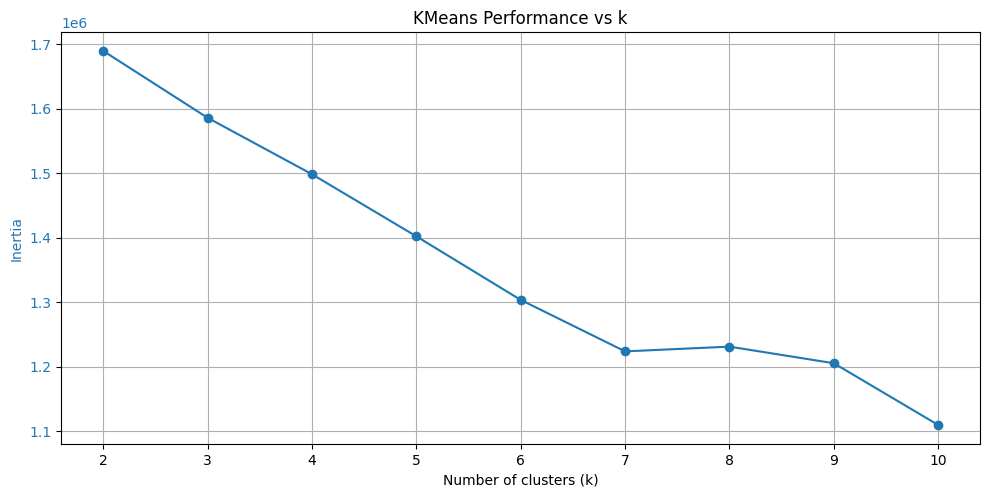

In [74]:
# Transform the data with your preprocessor
X_transformed = pipeline.named_steps['preprocess'].transform(hotel_df)

# Evaluate k in the range 2–10
evaluate_kmeans(X_transformed, k_range=range(2, 11))

#### ❓ Based on this plot, how many clusters would you choose? Create a plot (2D or 3D that visualizes these clusters.)

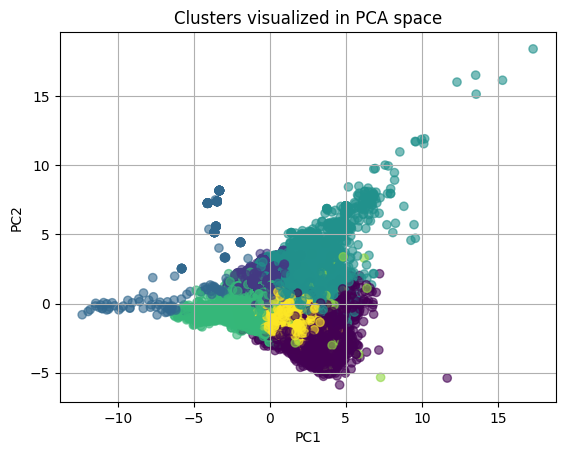

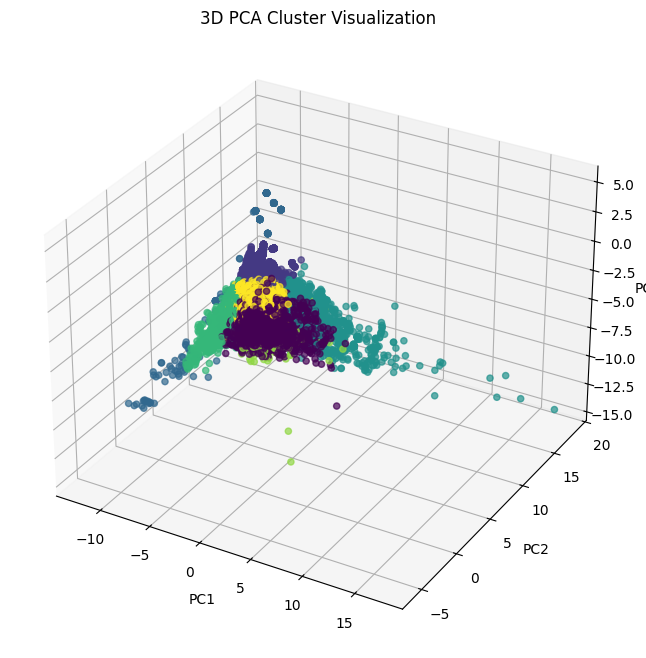

In [75]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('pca', PCA()), 
    ('kmeans', KMeans(n_clusters=7, random_state=4))
])

pipeline.fit(hotel_df)

# Get the PCA output
X_pca = pipeline.named_steps['pca'].transform(
    pipeline.named_steps['preprocess'].transform(hotel_df)
)

labels = pipeline.named_steps['kmeans'].labels_# Scatter plot of PCA components colored by cluster labels
plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=labels, 
    alpha=0.6
)

plt.title("Clusters visualized in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()



# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=labels,
    alpha=0.7
)

ax.set_title("3D PCA Cluster Visualization")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

#### ❓EXTRA: repeat this clustering technique with another linkage criterion. Do you get different results?

Again, this question is in the wrong section. We have moved it below.

#### Hierarchical clustering

#### ❓Another clustering techique is hierarchical clustering. Write down how that works in your own words.

Unfortunately, hierarchical clustering on big datasets requires a lot of computational resources, because the distances between every datapoint is calculated after every split/combine. 

It's therefore not feasible to use this type of clustering on our hotel dataset. This is why we have added a little toy dataset about different animals that can be clustered into similar animals. 

This dataset contains 101 animals from a zoo, which are described using 16 different traits. All of the traits are already converted to numerical variables.
There are 7 different classes of animal added to this dataset: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate. The class of the animal is left out of the dataset so we can see what our model does to the unlabeled data. The names of the animal (e.g. penguin, octopus...)  are recorded as well in the column 'names'. We will add them as an index to our dataset, so the nodes of the dendrogram (which we will talk about in a second) are labeled.

In [ ]:
zoo_df = pd.read_csv("data/zoo.tab", sep="\t")
zoo_df.index = zoo_df['name']
zoo_df = zoo_df.drop(columns=['name', 'type'])
zoo_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
name,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


The first step in hierarchical clustering is typically to create a dendrogram. A dendrogram visualizes the pairwise distances between observations using a tree-like structure. It shows how clusters are merged step by step, and it helps you decide how many clusters to choose in the final solution. Since the data is all numeric, the only transformation that's required now is to scale it. 

#### ❓Which variable would have a much larger impact than others if we wouldn't scale the data? Also look at the animals at the nodes. Are there any that are clustered completely wrong? If so, do you see any reason for that? What's drawing them close to the others?

We'll first create a dendogram without scaling the data. Afterwards, we'll create a new dendrogram after scaling and compare both.

In [ ]:
from scipy.cluster.hierarchy import linkage
import plotly.figure_factory as ff

# Perform hierarchical clustering without scaling
linked = linkage(zoo_df, method='ward')

# Plot dendrogram using the index labels
fig = ff.create_dendrogram(zoo_df, orientation='bottom', labels=zoo_df.index.astype(str).tolist())
fig.update_layout(width=1200, height=600)
fig.show()

In [ ]:
# Step 1: Standardize the data
scaler = StandardScaler()
zoo_scaled = scaler.fit_transform(zoo_df)

# Perform hierarchical clustering with scaling
linked = linkage(zoo_scaled, method='ward')

# Plot dendrogram using the index labels
fig = ff.create_dendrogram(zoo_scaled, orientation='bottom', labels=zoo_df.index.astype(str).tolist())
fig.update_layout(width=1200, height=600)
fig.show()

Without scaling, the number of legs has a very big impact on the resulting dendrogram. This is because the variable 'legs' is the only one that can take on values bigger than one. In the first dendrogram, we see that all animals having more than 4 legs are clustered together, even when they are not related at all. All animals without any legs, for example fish, dolphins and clams are also clustered together. 

The scaled tree is able to make a better distinction between the different classes, because it focuses on all columns equally. The aquatic mammals are clustered away from the other mammals for example, probably because they differ in 'aquatic' and 'fins' and 'legs'.
Overall, it looks like the tree is pretty well structured. Most animals in a similar class lay close together.

#### ❓Take a look at the dendogram above. To choose the number of clusters, draw a straight line through the dendrogram and see how many separate clusters you get at this point. For example, if you would draw the line at 9, you would have 2 separate clusters. 

<img src="images\dendro_solution.png" style="background-color:white;" />

Cutting at the black line would give 8 different clusters. Both cuts seem reasonable: not to many clusters, but the distances between them aren't too large. We could look at both options when designing the final model.

Finally, fill in the number of clusters you have decided on above in the code below. We'll cluster the data into these k groups and visualize again using PCA.

#### ❓Look up the documentation of the AgllomerativeClustering from sklearn.cluster. What type of linkage is used here? What does 'linkage criterion' mean?

The default linkage criterion is 'Ward'. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

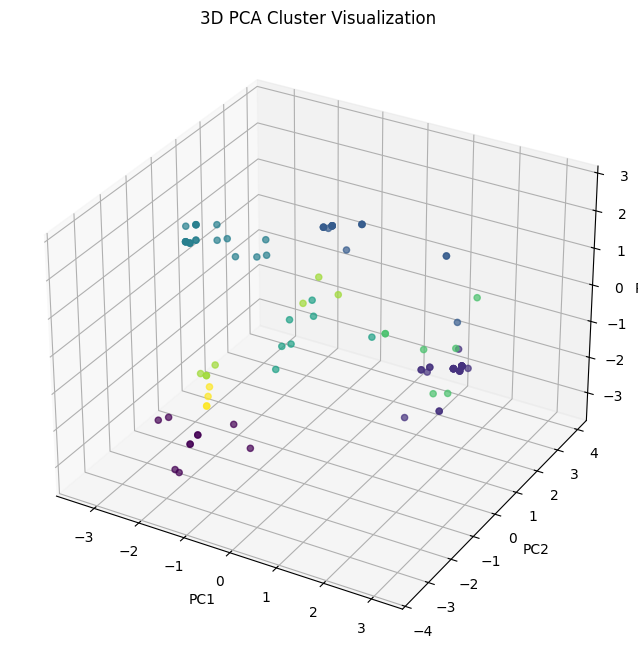

In [ ]:
from sklearn.cluster import AgglomerativeClustering


# Step 2: Apply PCA to reduce dimensionality
pca = PCA()
zoo_pca = pca.fit_transform(zoo_scaled)

# Step 3: Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = agg.fit_predict(zoo_pca)

# Add cluster labels to the original DataFrame
zoo_df['Cluster'] = clusters

model = AgglomerativeClustering(
    n_clusters= 8,      # adjust based on dendrogram
    linkage='ward'
)

zoo_labels = model.fit_predict(zoo_df)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    zoo_pca[:, 0],
    zoo_pca[:, 1],
    zoo_pca[:, 2],
    c=zoo_labels,
    alpha=0.7
)

ax.set_title("3D PCA Cluster Visualization")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

#### ❓EXTRA: repeat this clustering technique with another linkage criterion. Do you get different results?